In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy import table as table
from astropy import io as io
import scipy.optimize as fit

1 Curve Fitting Guided Problem
The following problem will walk you through how to fit a tricky curve to a set
of data.
This problem looks super long, but it’s not :)
1.1
Use pandas to do the following:
1. Read in the file “GlobalLandTemperaturesByState.csv”.
2. Filter the table to include only the columns for the date, temperature,
and state.
3. Filter the table to include only years after 2000.
4. Filter the table to include only the rows corresponding to Wyoming, Ne-
braska, or South Dakota. Check: your table should be 495 rows and 3
columns.

In [16]:
temps = pd.read_csv('GlobalLandTemperaturesByState.csv')
newtemps = temps.loc[:, ['dt','AverageTemperature','State']]
temps2000 = newtemps.loc[newtemps['dt'] >'2000']
nowheretemps = pd.concat([temps2000.loc[temps2000['State'] == 'Nebraska'], temps2000.loc[temps2000['State'] == 'South Dakota'], temps2000.loc[temps2000['State'] == 'Wyoming']])
nowheretemps

,dt,AverageTemperature,State
350761,2000-01-01,-2.024,Nebraska
350762,2000-02-01,1.719,Nebraska
350763,2000-03-01,5.687,Nebraska
350764,2000-04-01,9.417,Nebraska
350765,2000-05-01,16.827,Nebraska
...,...,...,...
626435,2013-05-01,10.607,Wyoming
626436,2013-06-01,16.267,Wyoming
626437,2013-07-01,20.222,Wyoming
626438,2013-08-01,19.621,Wyoming


1.2
Modify the table such that it contains the average temperature over all three
states for each date. It should have two columns: date and average temperature.
• Look into the pandas function groupby.

In [17]:
removestates= nowheretemps.loc[:, ['dt', 'AverageTemperature']]
data = removestates.groupby(['dt'], as_index=False).mean()
data


,dt,AverageTemperature
0,2000-01-01,-4.072000
1,2000-02-01,-0.205000
2,2000-03-01,3.642667
3,2000-04-01,7.609667
4,2000-05-01,14.255000
...,...,...
160,2013-05-01,13.196000
161,2013-06-01,18.783667
162,2013-07-01,22.110333
163,2013-08-01,21.890000


1.3
Use matplotlib.pyplot to plot the data from the table you created above. You
can pass pandas columns directly into matplotlib.pyplot without needing to
turn them into arrays.
1. Date on the x axis, average temperature on the y axis.
2. Label the axis and give the graph a title.
Now that the data is imported and plotted so you have an idea of what it looks
like, let’s get into the curve fitting.

<function matplotlib.pyplot.show(close=None, block=None)>

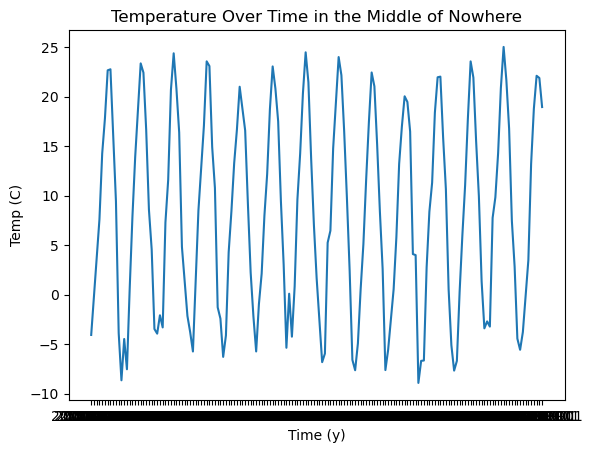

In [18]:
plt.figure()
x = data.iloc[:, 0]
y = data.iloc[:, 1]
plt.plot(x, y)
plt.title('Temperature Over Time in the Middle of Nowhere')
plt.xlabel('Time (y)')
plt.ylabel('Temp (C)')
plt.show

1.4
The function scipy.optimize, unsurprisingly, can only do math with numbers.
The date column of the table is currently composed of strings.
• Fix this and convert the string date into numerical values however you
see fit, and make it a column in the dataframe. Your numerical values
should capture all parts of the date provided in the string (don’t use just
the year, etc).

In [19]:
data['date'] = pd.to_datetime(data['dt'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
years = data
years


,dt,AverageTemperature,date,year,month,day
0,2000-01-01,-4.072000,2000-01-01,2000,1,1
1,2000-02-01,-0.205000,2000-02-01,2000,2,1
2,2000-03-01,3.642667,2000-03-01,2000,3,1
3,2000-04-01,7.609667,2000-04-01,2000,4,1
4,2000-05-01,14.255000,2000-05-01,2000,5,1
...,...,...,...,...,...,...
160,2013-05-01,13.196000,2013-05-01,2013,5,1
161,2013-06-01,18.783667,2013-06-01,2013,6,1
162,2013-07-01,22.110333,2013-07-01,2013,7,1
163,2013-08-01,21.890000,2013-08-01,2013,8,1


1.5
The function scipy.optimize requires: a model equation, and an initial guess
of parameters. For this section:
1. Define an appropriate model equation. Use a generic form like mx + b:
there should be four parameters.
2. Make an initial guess at the parameters and save them in an array.
• This part is really important. A dataset with a non polynomial pat-
tern was chosen for a reason: your initial guesses matter, particularly
the period.
• If you’re stuck, eyeball the length of the period (it should make phys-
ical sense, and remember that the units are in years) and keep this
in mind: cos(2x) means the function covers two periods in the space
of 2π.2 ∗ period = 2π, so each period is π long.

1.6
Run scipy.optimize’s curve fit function! Remember that it outputs a tuple
containing two arrays: the parameter array and the covariance matrix.
• If while attempting this, you get one of the following errors:
– Something about maximum depth
2
– Something about not being able to estimate the covariance
– A line that does not fit the data at all
You may need to re-examine your guesses for the initial parameters (par-
ticularly the period). This is why plotting the data before fitting it is
critical.

In [20]:
def modelfunc(x, a, b, c, d):
    return a*x**2 + b*x + c + d*np.cos(2*np.pi*x)
u = (years['year'] + (years['month'] - 1)/12).values
y = years['AverageTemperature'].values

p0 = np.array([0, 1/10, 1, 1])
params, cov = fit.curve_fit(modelfunc, u, y, p0=p0)
xfit = np.linspace(u.min(), u.max(), 2500)
yfit = modelfunc(xfit, *params)

1.7
Do the following:
1. Re-plot the data.
2. Plot the line outputted by curve fitter on the same graph as the data.
3. Make sure they mostly match up!

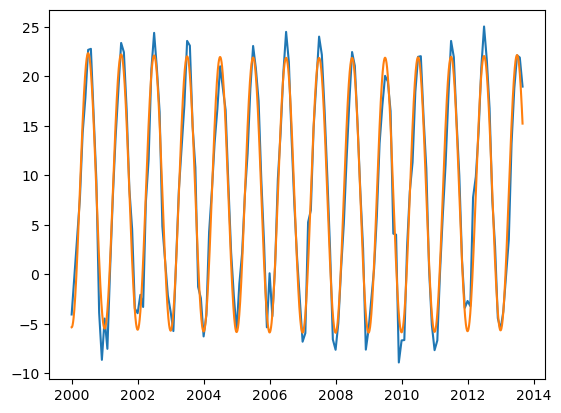

In [21]:
plt.figure()
plt.plot(u, y)
plt.plot(xfit, yfit)
plt.show()

1.8
Do they match? If so, you made it! Your curve fitting code looks great. Non
polynomial functions are tricky to fit, so congratulations on curve-fitting sinu-
soidal temperature variations! One last step (okay, two):
• Use the covariance matrix to calculate the errors for each parameter. Re-
call that the errors are located down the diagonal of the matrix.
– E.g: Parameter 1’s error is the square root of location [0,0] in the
matrix, 2’s error is at location [1,1], etc.

In [22]:
error = np.sqrt(np.diag(cov))
error

array([1.18371692e-02, 4.75104316e+01, 4.76725901e+04, 2.35479058e-01])

1.9
The final step! Print out your results!
1. Print out each parameter AND its corresponding error with format: pa-
rameter ± error.
2. Print out the final equation!
Congrats :) you did it!

In [23]:
for i, (parameter, error) in enumerate(zip(['a', 'b', 'c', 'd'], error)):
    print(f"Parameter {parameter}: {params[i]} +- {error}")
equation = (f"y = {params[0]} * x^2 + {params[1]} *x + {params[2]} + {params[3]} * cos(2*pi*x)")
equation

Parameter a: 0.009039410080211113 +- 0.011837169198942378
Parameter b: -36.29888291791091 +- 47.51043155938791
Parameter c: 36448.64011444367 +- 47672.59007690825
Parameter d: -13.881496039798638 +- 0.23547905809027334


'y = 0.009039410080211113 * x^2 + -36.29888291791091 *x + 36448.64011444367 + -13.881496039798638 * cos(2*pi*x)'

1.10
Goal: complete a linear regression fit to a dataset and evaluate the appropri-
ateness of the model. Do the following:
1. Read in one of the two .dat files: ’global CCl4 MM.dat’ or ’global SF6
MM.dat’. Don’t modify the file directly. Use astropy.table’s Table
library.
3
2. Convert the astropy Table into a pandas dataframe. Include columns:
date, global mean concentration, and global mean concentration sd.
3. Plot the data from the file with error. Matplotlib has a function that can
do this - look it up!
• Include axis labels and a title.
4. Fit an appropriate linear model. Use whatever package makes sense to
you (scipy.optimize, numpy.polyfit, etc)
5. Calculate the reduced chi-squared value.
6. Print out the parameters, their errors, the final equation, and the reduced
chi-squared value.
7. Write if a linear model seems appropriate. A residual plot is encouraged
but it is not required.
8. Bonus (0 points): Write a sentence or two about the molecule you’re
looking at and how that background may relate to the trend you’re seeing.


C:\Users\mapse\AppData\Local\Temp\ipykernel_63900\1218102593.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  CCl4dat['CCl4ottoyr'][i] = (CCl4dat['CCl4ottoyr'][i] + CCl4dat['CCl4ottomon'][i]/12)
C:\Users\mapse\AppData\Local\Temp\ipykernel

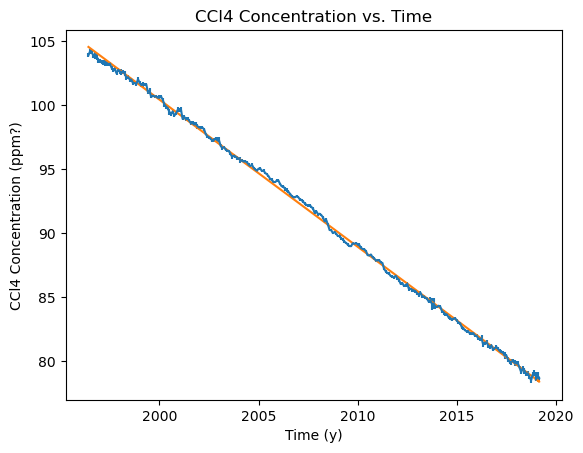

Parameters = [ 2.39711534e+03 -1.14834455e+00]
Error = [4.29185991e+00 2.13741869e-03]
y = 2397.115343609228 + -1.14834454573404 * x
Chi Squared = 0.0006147818046654338


In [56]:
CCl4dat = io.ascii.read('global_CCl4_MM.dat')
CCl4dat = CCl4dat.to_pandas()
CCl4dat = CCl4dat.iloc[4:282]
plt.figure()
for i in range(4, len(CCl4dat['CCl4ottoGLm'])):
    CCl4dat['CCl4ottoyr'][i] = (CCl4dat['CCl4ottoyr'][i] + CCl4dat['CCl4ottomon'][i]/12)
x = CCl4dat['CCl4ottoyr']
y = CCl4dat['CCl4ottoGLm']
error = CCl4dat['CCl4ottoGLsd']
plt.errorbar(x, y, error)
plt.xlabel('Time (y)')
plt.ylabel('CCl4 Concentration (ppm?)')
plt.title('CCl4 Concentration vs. Time')

def linear(a, b, x):
    return a*x + b
p0 = [-1, 105]
params, cov = fit.curve_fit(linear, x, y, p0=p0)
a, b = params
xline = CCl4dat['CCl4ottoyr']
yline = linear(xline, *params)
plt.plot(xline, yline)
plt.show()

def chi_squared():
    top = 0
    bottom =0
    for i in range(4, len(CCl4dat['CCl4ottoGLm'])):
        top += (CCl4dat['CCl4ottoGLm'][i]-linear(xline[i], *params))**2
        bottom += (yline[i])
    return top/bottom
print(f'Parameters = {params}')
error = np.sqrt(np.diag(cov))
print(f'Error = {error}')
finalequation = (f"y = {params[0]} + {params[1]} * x")
print(finalequation)
print(f'Chi Squared = {chi_squared()}')

#The linear model is a good fit or the data, shown by the chi-squared value of 0.0006.

#What I'm looking at is a plot of CCl4, an ozone hole destruction contributor's, concentration versus time. It is decreasing because CFCs like CCl4
#were banned in 1987 by the Montreal Protocol because they were destroying the ozone layer, which would have devastating consequences for humanity.